# Sentiment Analysis on Twitter Dataset

## Introduction
The social media platforms and online forums has led to the generation of vast amounts of user-generated content every day. Sentiment analysis, which involves determining the sentiment or emotion conveyed in a piece of text, has become a crucial tool for businesses, researchers, and organizations. In this project, we aim to build a sentiment analysis model using the Sentiment140 dataset, a popular open-source dataset consisting of tweets, to classify them into sentiment categories like positive, negative, or neutral.

## Objective
The main goal of this project is to design and implement a sentiment analysis pipeline using natural language processing (NLP) techniques and open-source tools. The objectives include:
1. Preprocessing raw text data to extract relevant features.
2. Developing and training machine learning models for sentiment classification.
3. Comparing the performance of different algorithms and techniques.
4. Providing insights into the challenges and potential applications of sentiment analysis.

## Dataset
For this project, we will use the **Sentiment140** dataset, which contains 1.6 million tweets labeled as positive, negative, or neutral. This dataset is chosen for its size, diversity, and accessibility, making it ideal for sentiment analysis. The dataset will undergo preprocessing to remove noise and prepare it for analysis.

### Other Potential Datasets:
- **IMDb Reviews**: A collection of movie reviews labeled by sentiment.
- **Amazon Product Reviews**: Product reviews with corresponding ratings and sentiment labels.

## Methodology

### 1. Data Preprocessing
Data preprocessing is crucial for preparing raw text data for machine learning models. The preprocessing steps include:
- **Tokenization**: Breaking down the text into individual words or tokens.
- **Stemming/Lemmatization**: Reducing words to their base or root form.
- **Removing stop words, punctuation, and non-alphanumeric characters**: Cleaning up the text for analysis.
- **Handling imbalanced data**: Using techniques such as oversampling or undersampling to address class imbalances.

### 2. Feature Engineering
Once the data is preprocessed, we will convert the text into numerical representations using:
- **TF-IDF (Term Frequency-Inverse Document Frequency)**: To capture the importance of words in the dataset.
- **Word2Vec**: A model that generates vector representations of words.
- **Pre-trained embeddings**: Using models like GloVe or BERT to improve word representations.

### 3. Model Development
We will implement various machine learning models for sentiment classification, including traditional models (e.g., Logistic Regression, Support Vector Machines) and more advanced deep learning models (e.g., LSTM, BERT).

### 4. Model Evaluation
To assess the performance of our models, we will use the following metrics:
- **Accuracy**: The proportion of correctly classified instances.
- **Precision, Recall, and F1-Score**: Metrics that provide deeper insight into model performance, especially for imbalanced datasets.
- **ROC-AUC**: To evaluate the trade-off between true positive rate and false positive rate.
- **Cross-validation**: To ensure the model generalizes well across different data subsets.
- **Hyperparameter Tuning**: To optimize the model for better performance.

### 5. Visualization
We will visualize the results of our sentiment analysis with:
- **Confusion Matrices**: To visualize the true positives, false positives, true negatives, and false negatives.
- **Sentiment Distribution Graphs**: To show the distribution of sentiments across the dataset.
- **Feature Importance Plots**: To understand which features are most influential in sentiment classification.

## Expected Outcomes
Upon completion of this project, we expect to achieve:
1. A fully functional sentiment analysis pipeline capable of classifying textual data accurately.
2. A comparative analysis of traditional machine learning models versus modern deep learning approaches.
3. Insights into the effectiveness of different feature extraction techniques and word embeddings.
4. Recommendations for improving sentiment analysis in practical applications.

## Applications
The results of this project could have several real-world applications:
- **Business**: Analyzing customer feedback to gain insights into customer satisfaction and product improvements.
- **Social Media Monitoring**: Tracking public opinion trends across platforms like Twitter.
- **Recommendation Systems**: Enhancing product or movie recommendations based on user sentiment.

## Tools and Technologies
The following tools and technologies will be used in this project:
- **Programming Language**: Python
- **Libraries and Frameworks**: scikit-learn, TensorFlow, PyTorch, NLTK, spaCy
- **Data Visualization**: Matplotlib, Seaborn

## Conclusion
This project will contribute to the field of Natural Language Processing (NLP) by providing an in-depth analysis of sentiment classification techniques using an open-source dataset. The insights gained will further the understanding of sentiment analysis pipelines and inspire future research in this domain.

## References
- Available Open-Source Datasets: Sentiment140, IMDb Reviews, Amazon Reviews.


In [2]:
#load the required imports
import os
os.environ['TF_ENABLE-ONEDNN-OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='2'

import time
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

import requests

from collections import Counter
from wordcloud import WordCloud


In [3]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/subash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/subash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Step 1: Check and Download Dataset
The dataset is checked locally; if not found, it is downloaded from Stanford's official source.

In [4]:
dataset_path = "training.1600000.processed.noemoticon.csv"
if not os.path.exists(dataset_path):
    print("Dataset not found.")
    print("Download the dataset from kaggle.")


### About this file

This is the sentiment140 dataset.
It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

* target: the polarity of the tweet (0 = negative,  4 = positive)
* ids: The id of the tweet ( 2087)
* date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
* flag: The query (lyx). If there is no query, then this value is NO_QUERY.
* user: the user that tweeted (robotickilldozr)
* text: the text of the tweet (Lyx is cool)



### Step 2: Load Dataset

In [5]:

# The dataset is loaded and unnecessary columns are dropped.

# set num of rows 
# using lower when running locally
# nrows=50000
# ,nrows=nrows
columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names=columns )
df = df[['target', 'text']]
df['target'] = df['target'].map({0: 'negative', 4: 'positive'})

# getting only 1% to run locally
df = df.sample(frac=0.01)



### Step 3: Exploratory Data Analysis (EDA)

In [6]:

# We analyze the dataset by checking class distribution, text length, and most common words.
print("Dataset Info:\n", df.info())
print("Class Distribution:\n", df['target'].value_counts())


<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 129810 to 925440
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  16000 non-null  object
 1   text    16000 non-null  object
dtypes: object(2)
memory usage: 375.0+ KB
Dataset Info:
 None
Class Distribution:
 target
negative    8026
positive    7974
Name: count, dtype: int64


In [7]:
print("Dataset Overview:\n")
df.head()

Dataset Overview:



,target,text
129810,negative,is about to leave for school. Gotta get throu...
5604,negative,got to go study i hate the junior cert cant w...
365879,negative,@summerburtech This is how I feel lately about...
1349801,positive,@ModernEcoHomes Will do! Busy organizing our s...
90393,negative,Can't believe we havent got #bigweekend as a t...


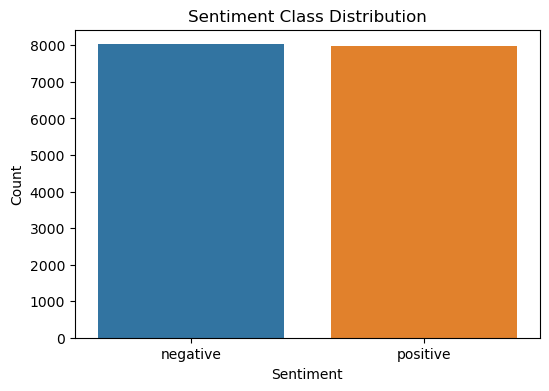

In [8]:
# Visualizing Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['target'], hue=df['target'], legend=False)
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

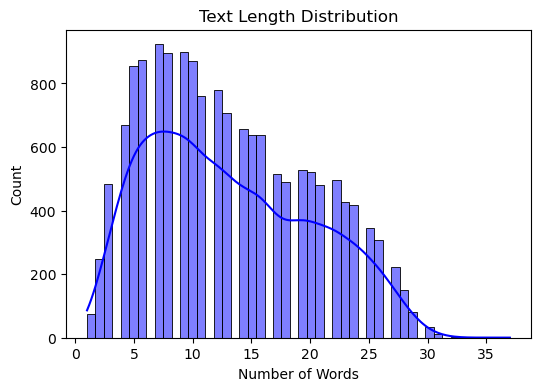

In [9]:
# Text Length Analysis
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6,4))
sns.histplot(df['text_length'], bins=50, kde=True, color='blue')
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()


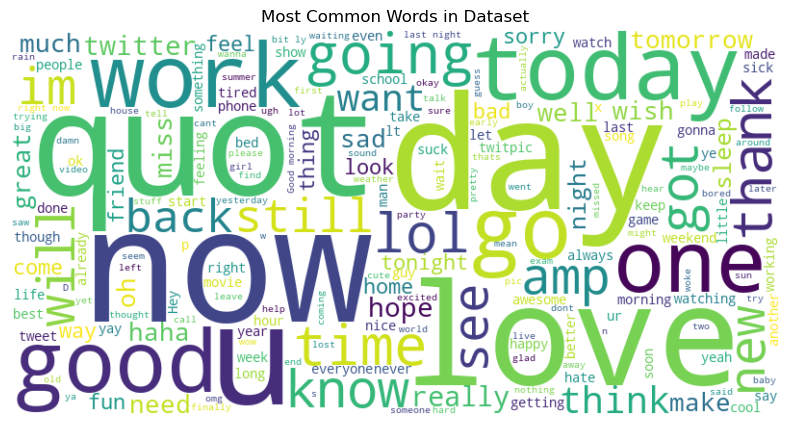

In [10]:
# Common Words Visualization

all_words = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Dataset')
plt.show()


### Step 4: Text Preprocessing

In [11]:

# The text is cleaned by removing special characters, URLs, and stopwords. Then, lemmatization is applied.
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess_text)



### Step 5: Split Dataset

In [12]:

# The dataset is split into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['target'], test_size=0.2, random_state=42)



### Step 6: Feature Extraction (TF-IDF)

In [13]:

# Convert text into numerical representations using TF-IDF.
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



### Step 7: Train and Evaluate Machine Learning Models

##### Traditional Machine Learning Models
* Logistic Regression 
* Support Vector Machine (SVM) 
* Random Forest Classifier 
* Naïve Bayes 

In [14]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear'),
    'Naïve Bayes': MultinomialNB()
}
classification_reports = {}

for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    end_time = time.time()
    print(f"{name} Performance:")
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[name] = report
    print(classification_report(y_test, y_pred))
    print(f"Training time for {name}: {end_time - start_time:.2f} seconds")
    print("-"*50)


Training Logistic Regression...
Logistic Regression Performance:
              precision    recall  f1-score   support

    negative       0.75      0.74      0.75      1618
    positive       0.74      0.75      0.75      1582

    accuracy                           0.75      3200
   macro avg       0.75      0.75      0.75      3200
weighted avg       0.75      0.75      0.75      3200

Training time for Logistic Regression: 0.07 seconds
--------------------------------------------------
Training Random Forest...
Random Forest Performance:
              precision    recall  f1-score   support

    negative       0.74      0.74      0.74      1618
    positive       0.74      0.74      0.74      1582

    accuracy                           0.74      3200
   macro avg       0.74      0.74      0.74      3200
weighted avg       0.74      0.74      0.74      3200

Training time for Random Forest: 10.76 seconds
--------------------------------------------------
Training SVM...
SVM Perform

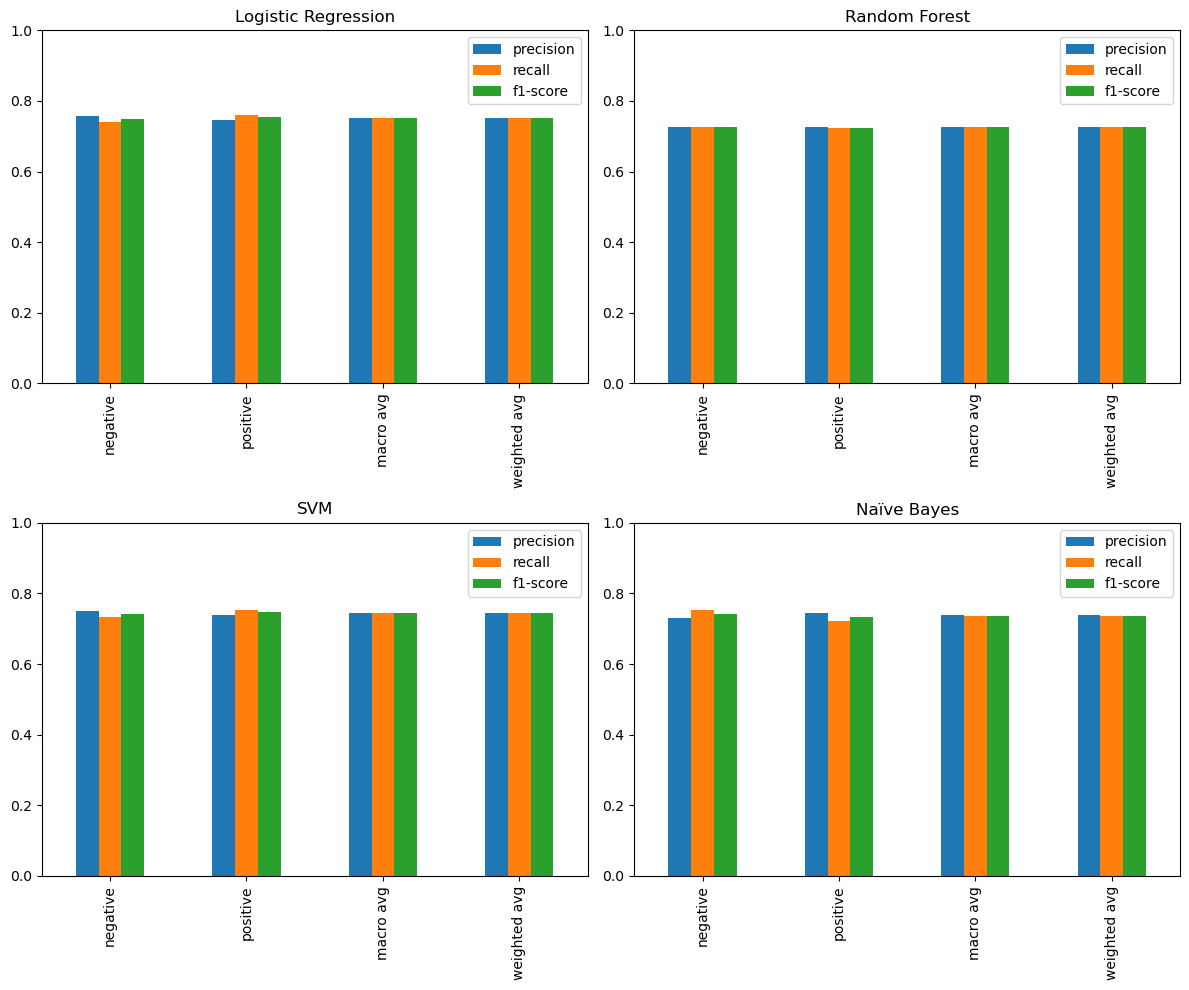

In [ ]:
# Plot classification reports for traditional models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, report) in enumerate(classification_reports.items()):
    scores = pd.DataFrame(report).T
    scores = scores[['precision', 'recall', 'f1-score']].drop('accuracy', errors='ignore')
    scores.plot(kind='bar', ax=axes[i], title=name)
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

#### with Hyper Parameter 

In [ ]:
report_start_time = time.time()

param_grid = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 300, 500],
        'max_depth': [10, 30, 50, None],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Naïve Bayes': {
        'alpha': [0.1, 0.5, 1, 5],
        'fit_prior': [True, False]
    }
}

best_models = {}
classification_reports = {}

for name, model in {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': MultinomialNB()
}.items():
    print(f"Tuning hyperparameters for {name}...")
    start_time = time.time()
    # change pre_dispatch based on 2 *CPU cores to be used
    grid_search = GridSearchCV(model, param_grid[name], cv=3, scoring='accuracy', n_jobs=-1 ,pre_dispatch=8)
    grid_search.fit(X_train_tfidf, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    y_pred = best_model.predict(X_test_tfidf)
    end_time = time.time()
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"{name} Performance:")
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[name] = report
    print(classification_report(y_test, y_pred))
    print(f"Training time for {name}: {end_time - start_time:.2f} seconds")
    print("-"*50)

report_end_time = time.time()
print(f"Total time for training and evaluation: {report_end_time - report_start_time:.2f} seconds")


Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Performance:
              precision    recall  f1-score   support

    negative       0.76      0.71      0.73      1603
    positive       0.72      0.77      0.75      1597

    accuracy                           0.74      3200
   macro avg       0.74      0.74      0.74      3200
weighted avg       0.74      0.74      0.74      3200

Training time for Logistic Regression: 8.16 seconds
--------------------------------------------------
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Random Forest Performance:
              precision    recall  f1-score   support

    negative       0.74      0.70      0.72      1603
    positive       0.71      0.76      0.74      1597

    accuracy                           0.73      3200
   macro

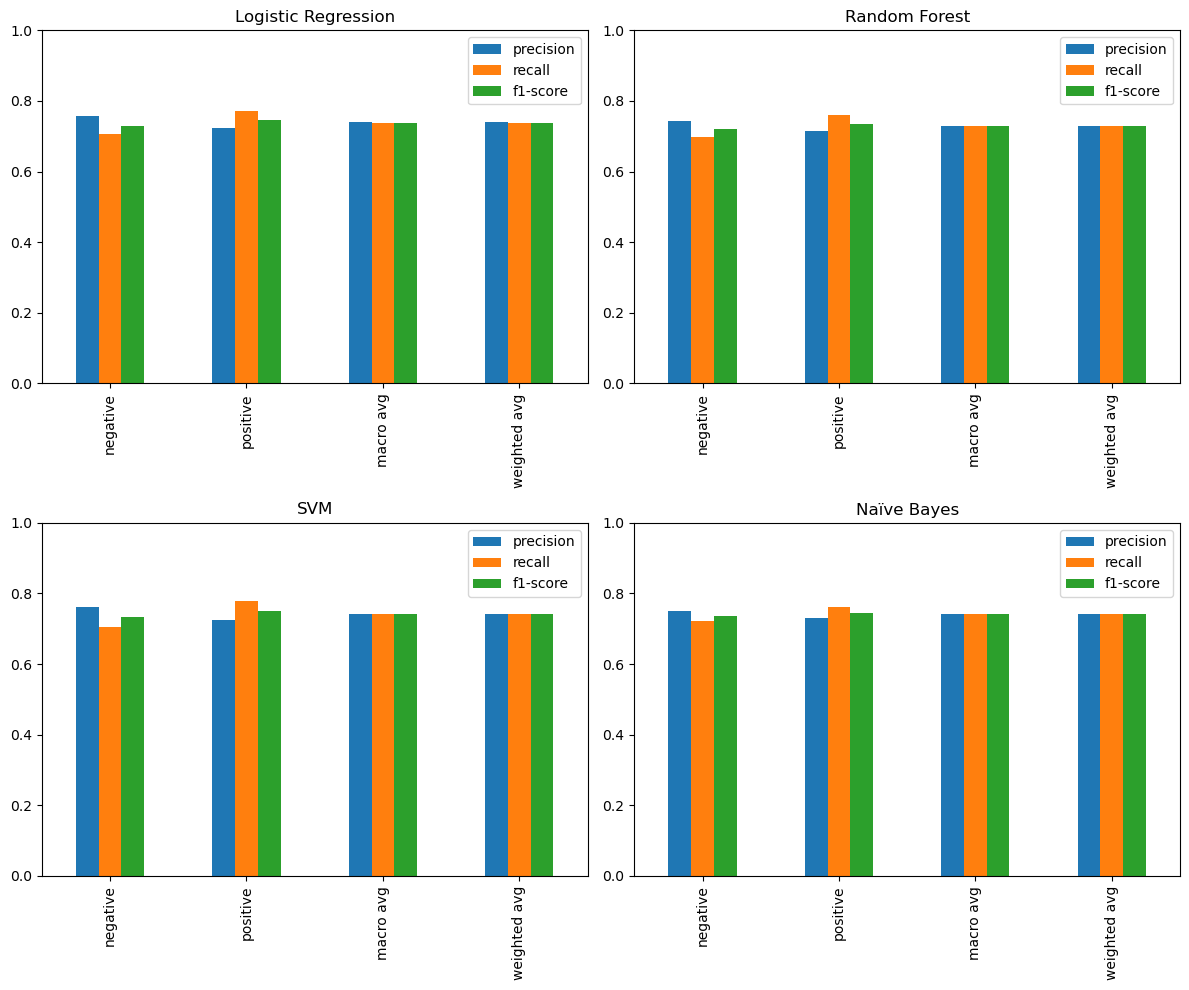

In [ ]:
# Plot classification reports for traditional models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, report) in enumerate(classification_reports.items()):
    scores = pd.DataFrame(report).T
    scores = scores[['precision', 'recall', 'f1-score']].drop('accuracy', errors='ignore')
    scores.plot(kind='bar', ax=axes[i], title=name)  #, colormap='viridis'
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### DeepLearning Models

In [ ]:
# Define parameters
max_words = 10000
max_len = 100

# Tokenization and Padding
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

# Splitting dataset into training, validation, and test sets
X_train_seq, X_val_seq, y_train_bin, y_val_bin = train_test_split(
    X_train_seq, np.array(y_train.map({'negative': 0, 'positive': 1})), test_size=0.2, random_state=42
)

X_val, X_test_seq, y_val, y_test_seq = train_test_split(
    X_test_seq, np.array(y_test.map({'negative': 0, 'positive': 1})), test_size=0.5, random_state=42
)



In [30]:
# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [32]:
# Function to create LSTM model for hyperparameter tuning
def create_lstm_model(units=64, dropout_rate=0.2):
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128),
        LSTM(units, dropout=dropout_rate, recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:

# Train LSTM Model
lstm_model = create_lstm_model()
lstm_model.fit(X_train_seq, y_train_bin, epochs=5, batch_size=64, validation_data=(X_val_seq, y_val_bin))


Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.6041 - loss: 0.6537 - val_accuracy: 0.7336 - val_loss: 0.5240
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.8251 - loss: 0.4101 - val_accuracy: 0.7238 - val_loss: 0.5479
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.8708 - loss: 0.3137 - val_accuracy: 0.7098 - val_loss: 0.6111
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.8998 - loss: 0.2541 - val_accuracy: 0.7020 - val_loss: 0.7252
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.9202 - loss: 0.2101 - val_accuracy: 0.6934 - val_loss: 0.7676


In [19]:

evaluate_model(lstm_model, X_test_seq, y_test_seq)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.70      0.70      0.70       798
    Positive       0.70      0.70      0.70       802

    accuracy                           0.70      1600
   macro avg       0.70      0.70      0.70      1600
weighted avg       0.70      0.70      0.70      1600


Confusion Matrix:
[[562 236]
 [241 561]]


In [ ]:
# Function to create BiLSTM model
def create_bilstm_model(units=64, dropout_rate=0.2):
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128),
        Bidirectional(LSTM(units, dropout=dropout_rate, recurrent_dropout=0.2)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train BiLSTM Model
bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_seq, y_train_bin, epochs=3, batch_size=64, validation_data=(X_val_seq, y_val_bin))



Epoch 1/3


160/160 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.5737 - loss: 0.6578 - val_accuracy: 0.7242 - val_loss: 0.5321
Epoch 2/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.8154 - loss: 0.4133 - val_accuracy: 0.7289 - val_loss: 0.5479
Epoch 3/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.8705 - loss: 0.3100 - val_accuracy: 0.7176 - val_loss: 0.6133


In [21]:
evaluate_model(bilstm_model, X_test_seq, y_test_seq)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.69      0.71       798
    Positive       0.71      0.76      0.73       802

    accuracy                           0.72      1600
   macro avg       0.72      0.72      0.72      1600
weighted avg       0.72      0.72      0.72      1600


Confusion Matrix:
[[552 246]
 [196 606]]


In [ ]:

# Function to create CNN model
def create_cnn_model(filters=128, kernel_size=5, dropout_rate=0.5):
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128),
        Conv1D(filters, kernel_size, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train CNN Model
cnn_model = create_cnn_model()
cnn_model.fit(X_train_seq, y_train_bin, epochs=3, batch_size=64, validation_data=(X_val_seq, y_val_bin))



Epoch 1/3


160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.5184 - loss: 0.6869 - val_accuracy: 0.7105 - val_loss: 0.5594
Epoch 2/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.7932 - loss: 0.4649 - val_accuracy: 0.7199 - val_loss: 0.5377
Epoch 3/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8836 - loss: 0.2967 - val_accuracy: 0.6980 - val_loss: 0.6447


In [23]:
evaluate_model(cnn_model, X_test_seq, y_test_seq)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.68      0.70       798
    Positive       0.70      0.75      0.72       802

    accuracy                           0.71      1600
   macro avg       0.71      0.71      0.71      1600
weighted avg       0.71      0.71      0.71      1600


Confusion Matrix:
[[543 255]
 [204 598]]
